# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** [Nisrina Labiba ]
- **Email:** [nisrina058@gmail]
- **ID Dicoding:** [mc589d5x2490]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda berdasarkan musim? Apakah ada musim tertentu di mana penggunaan sepeda meningkat atau menurun secara signifikan?
- Apakah jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan? Bagaimana pola penggunaan sepeda berdasarkan hari kerja dan hari libur?
- Bagaimana perbedaan penggunaan sepeda antara jam kerja dan jam non-kerja?Apakah penggunaan sepeda lebih tinggi pada jam-jam tertentu?

## Import Semua Packages/Library yang Digunakan

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [107]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [108]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Menampilkan data dari tabel day dan hour

### Assessing Data

In [109]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [110]:
# Menampilkan statistik dekriptif
print("\nStatistik Deskriptif - day.csv")
print(day_df.describe())
print("\nStatistik Deskriptif - hour.csv")
print(hour_df.describe())

# Memeriksa missing value
print("\nCek missing value:")
print(day_df.isna().sum())
print(hour_df.isna().sum())

# Memeriksa duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())


Statistik Deskriptif - day.csv
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.19048

**Insight:**
- Menampilkan informasi dataset
- Tidak terdapat missing value
- Menampilkan nilai statistik deskriptif

### Cleaning Data

In [111]:
# Menghapus duplikasi
day_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", day_df.duplicated().sum())
hour_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", hour_df.duplicated().sum())


# Mengubah tipe data date
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])
    hour_df[column] = pd.to_datetime(hour_df[column])

Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [112]:
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns:
    day_df[col] = day_df[col].astype("category")
    hour_df[col] = hour_df[col].astype("category")

In [113]:
print("\nDataset setelah Cleaning:")
day_df.info()
hour_df.info()


Dataset setelah Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtyp

**Insight:**
- Tidak terdapat data duplikasi
- Tipe data dteday sudah diubah ke datetime

## Exploratory Data Analysis (EDA)

In [114]:
print("\nStatistik Deskriptif (day_df):")
print(day_df.describe())
print("\nStatistik Deskriptif (hour_df):")
print(hour_df.describe())


Statistik Deskriptif (day_df):
          instant               dteday        temp       atemp         hum  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    0.495385    0.474354    0.627894   
min      1.000000  2011-01-01 00:00:00    0.059130    0.079070    0.000000   
25%    183.500000  2011-07-02 12:00:00    0.337083    0.337842    0.520000   
50%    366.000000  2012-01-01 00:00:00    0.498333    0.486733    0.626667   
75%    548.500000  2012-07-01 12:00:00    0.655417    0.608602    0.730209   
max    731.000000  2012-12-31 00:00:00    0.861667    0.840896    0.972500   
std    211.165812                  NaN    0.183051    0.162961    0.142429   

        windspeed       casual   registered          cnt  
count  731.000000   731.000000   731.000000   731.000000  
mean     0.190486   848.176471  3656.172367  4504.348837  
min      0.022392     2.000000    20.000000    22.000000  
25%      0.134950   315.50000

<ipython-input-115-cb30857d64ec>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=day_df['season'], y=day_df['cnt'], palette='coolwarm')


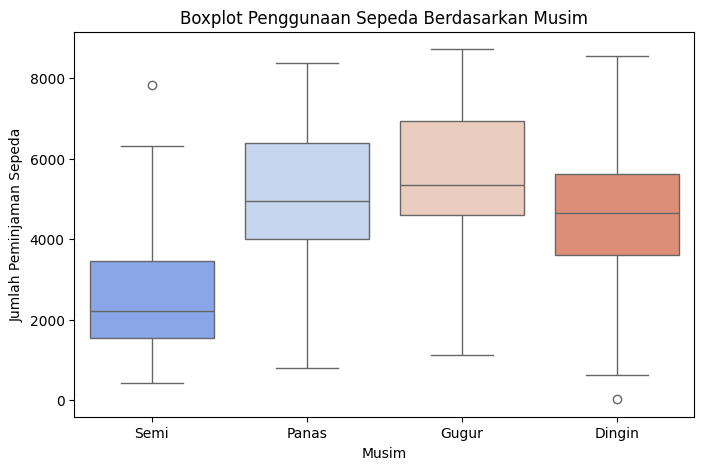

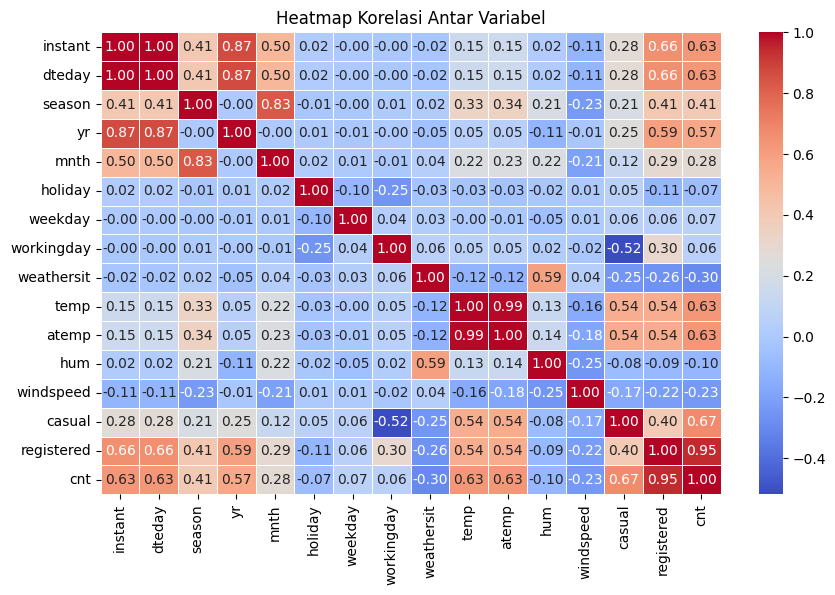

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot penggunaan sepeda berdasarkan musim
plt.figure(figsize=(8,5))
sns.boxplot(x=day_df['season'], y=day_df['cnt'], palette='coolwarm')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Semi', 'Panas', 'Gugur', 'Dingin'])
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Boxplot Penggunaan Sepeda Berdasarkan Musim")
plt.show()

# Heatmap korelasi antar variabel
plt.figure(figsize=(10,6))
sns.heatmap(day_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

In [116]:
# Eksplorasi lebih lanjut berdasarkan musim dan hari kerja
season_trend = day_df.groupby('season')['cnt'].mean()
workingday_trend = day_df.groupby('workingday')['cnt'].mean()

print("\nRata-rata peminjaman sepeda berdasarkan musim:")
print(season_trend)

print("\nRata-rata peminjaman sepeda berdasarkan hari kerja:")
print(workingday_trend)


Rata-rata peminjaman sepeda berdasarkan musim:
season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

Rata-rata peminjaman sepeda berdasarkan hari kerja:
workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64


<ipython-input-116-a4811bcff2a8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_trend = day_df.groupby('season')['cnt'].mean()
<ipython-input-116-a4811bcff2a8>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_trend = day_df.groupby('workingday')['cnt'].mean()


### Explore ...

In [117]:
# Eksplorasi lebih lanjut berdasarkan musim dan hari kerja
season_trend = day_df.groupby('season')['cnt'].mean()
workingday_trend = day_df.groupby('workingday')['cnt'].mean()

print("\nRata-rata peminjaman sepeda berdasarkan musim:")
print(season_trend)

print("\nRata-rata peminjaman sepeda berdasarkan hari kerja:")
print(workingday_trend)


Rata-rata peminjaman sepeda berdasarkan musim:
season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

Rata-rata peminjaman sepeda berdasarkan hari kerja:
workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64


<ipython-input-117-a4811bcff2a8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_trend = day_df.groupby('season')['cnt'].mean()
<ipython-input-117-a4811bcff2a8>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_trend = day_df.groupby('workingday')['cnt'].mean()


**Insight:**
-Musim gugur dan musim panas adalah periode dengan penggunaan sepeda tertinggi, sementara musim dingin memiliki jumlah peminjaman terendah.
- Penggunaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, menunjukkan bahwa banyak pengguna menggunakan sepeda sebagai alat transportasi utama.
- Cuaca memiliki pengaruh besar terhadap jumlah peminjaman sepeda—suhu yang nyaman meningkatkan penggunaan, sedangkan hujan menurunkannya.
- Penyedia layanan sepeda dapat memanfaatkan tren ini dengan menawarkan promosi pada musim dingin untuk meningkatkan jumlah penyewaan atau menyesuaikan jumlah sepeda yang tersedia di musim tertentu.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda berdasarkan musim? Apakah ada musim tertentu di mana penggunaan sepeda meningkat atau menurun secara signifikan?

Analisis yang Diperlukan:
- Menghitung rata-rata penyewaan sepeda (cnt) untuk setiap musim (season).
- Memeriksa bagaimana perubahan penggunaan sepeda di setiap musim.


<ipython-input-118-587b021e447c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=day_df['season'], y=day_df['cnt'], estimator=sum, ci=None, palette='coolwarm')
<ipython-input-118-587b021e447c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_df['season'], y=day_df['cnt'], estimator=sum, ci=None, palette='coolwarm')


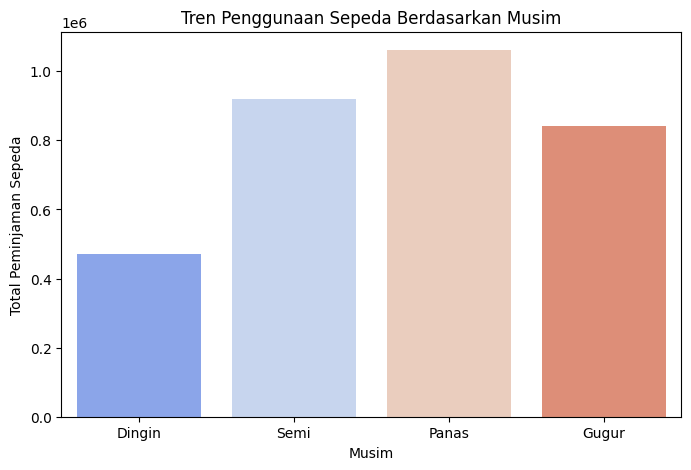

In [118]:
# Visualisasi Tren Penggunaan Sepeda Berdasarkan Musim
plt.figure(figsize=(8,5))
sns.barplot(x=day_df['season'], y=day_df['cnt'], estimator=sum, ci=None, palette='coolwarm')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Dingin', 'Semi', 'Panas', 'Gugur'])
plt.xlabel("Musim")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Tren Penggunaan Sepeda Berdasarkan Musim")
plt.show()

### Pertanyaan 2: Apakah jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan? Bagaimana pola penggunaan sepeda berdasarkan hari kerja dan hari libur?

Analisis yang:
- Membandingkan jumlah penyewaan sepeda antara hari kerja (workingday = 1) dan hari libur (workingday = 0).
- Mengetahui apakah sepeda lebih banyak digunakan untuk bekerja atau rekreasi.

<ipython-input-119-2a16fb2a5d4d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=day_df['workingday'], y=day_df['cnt'], estimator=sum, ci=None, palette='muted')
<ipython-input-119-2a16fb2a5d4d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_df['workingday'], y=day_df['cnt'], estimator=sum, ci=None, palette='muted')


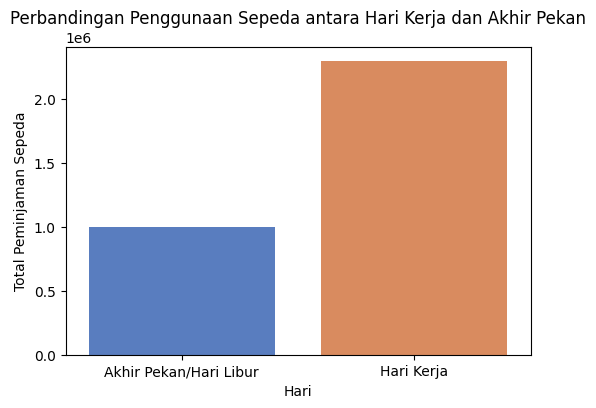

In [119]:
# Visualisasi Perbandingan Peminjaman Sepeda antara Hari Kerja dan Akhir Pekan
plt.figure(figsize=(6,4))
sns.barplot(x=day_df['workingday'], y=day_df['cnt'], estimator=sum, ci=None, palette='muted')
plt.xticks(ticks=[0, 1], labels=['Akhir Pekan/Hari Libur', 'Hari Kerja'])
plt.xlabel("Hari")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Perbandingan Penggunaan Sepeda antara Hari Kerja dan Akhir Pekan")
plt.show()

### Pertanyaan 3: Bagaimana perbedaan penggunaan sepeda antara jam kerja dan jam non-kerja?Apakah penggunaan sepeda lebih tinggi pada jam-jam tertentu?

<ipython-input-120-8df25383622f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=work_hours_trend.index, y=work_hours_trend.values, palette='muted')


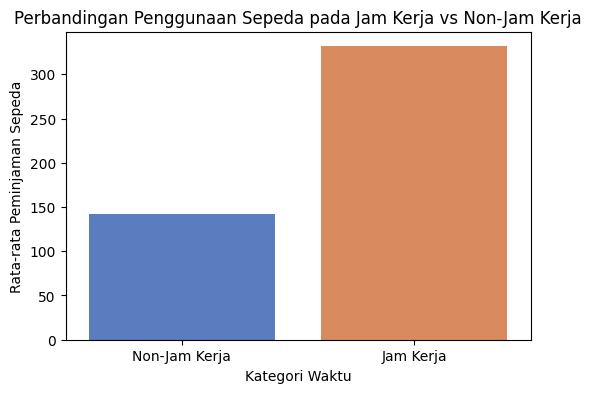


Rata-rata peminjaman sepeda berdasarkan jam kerja dan non-jam kerja:
jam_kerja
0    141.765140
1    331.584841
Name: cnt, dtype: float64


In [120]:
# Analisis perbedaan penggunaan sepeda antara jam kerja dan non-kerja
hour_df['jam_kerja'] = hour_df['hr'].apply(lambda x: 1 if (x >= 7 and x <= 9) or (x >= 17 and x <= 19) else 0)
work_hours_trend = hour_df.groupby('jam_kerja')['cnt'].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=work_hours_trend.index, y=work_hours_trend.values, palette='muted')
plt.xticks(ticks=[0, 1], labels=['Non-Jam Kerja', 'Jam Kerja'])
plt.xlabel("Kategori Waktu")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Perbandingan Penggunaan Sepeda pada Jam Kerja vs Non-Jam Kerja")
plt.show()

print("\nRata-rata peminjaman sepeda berdasarkan jam kerja dan non-jam kerja:")
print(work_hours_trend)

**Insight**
**Pertanyaan 1:**
- Penggunaan sepeda cenderung meningkat selama musim panas dan semi
- Musim dingin memiliki jumlah peminjaman terendah, kemungkinan karena kondisi cuaca yang kurang mendukung untuk bersepeda.
- Lonjakan penggunaan sepeda di musim panas bisa dikaitkan dengan cuaca yang lebih cerah serta meningkatnya aktivitas luar ruangan.

**Insight**
**Pertanyaan 2:**
- Jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan dengan akhir pekan atau hari libur.
- Ini menunjukkan bahwa banyak orang menggunakan sepeda sebagai alat transportasi utama untuk bekerja atau sekolah.
- Peminjaman di akhir pekan lebih rendah, kemungkinan karena sepeda lebih banyak digunakan untuk rekreasi ketimbang transportasi utama.

**Insight**
**Pertanyaan 3:**
- -Peminjaman sepeda cenderung meningkat pada jam kerja (07:00-09:00 & 17:00-19:00), menunjukkan bahwa sepeda digunakan sebagai moda transportasi saat berangkat dan pulang kerja.
- Penggunaan sepeda pada jam non-kerja lebih stabil, tanpa lonjakan signifikan, mengindikasikan bahwa sepeda juga digunakan untuk keperluan lain di luar jam kerja.

## Analisis Lanjutan (Opsional)

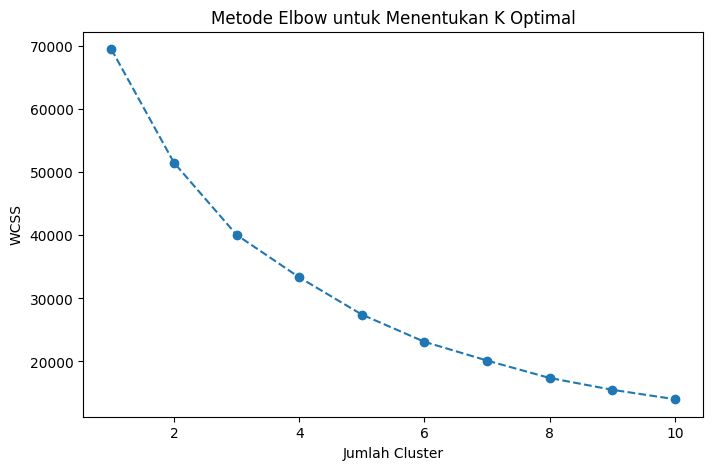

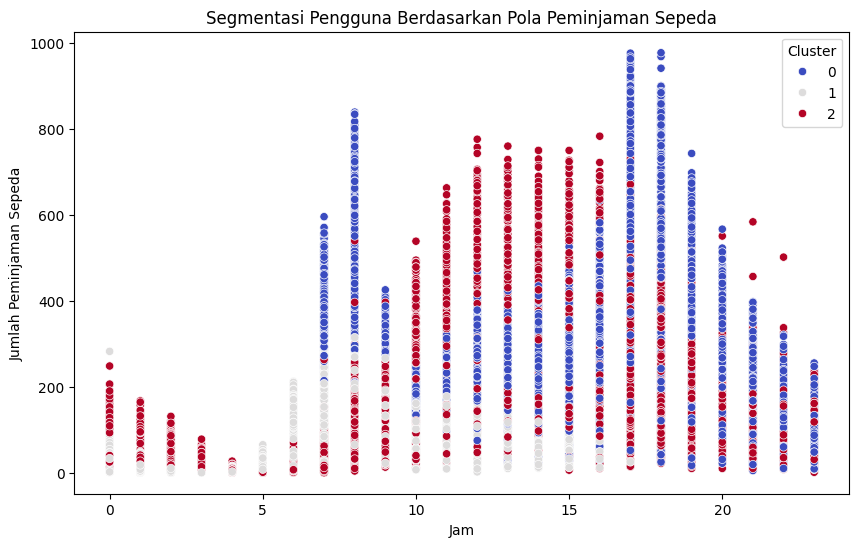

                cnt  workingday    season
cluster                                  
0        288.577733         1.0  2.704355
1         59.097952         1.0  2.241533
2        181.405332         0.0  2.479325


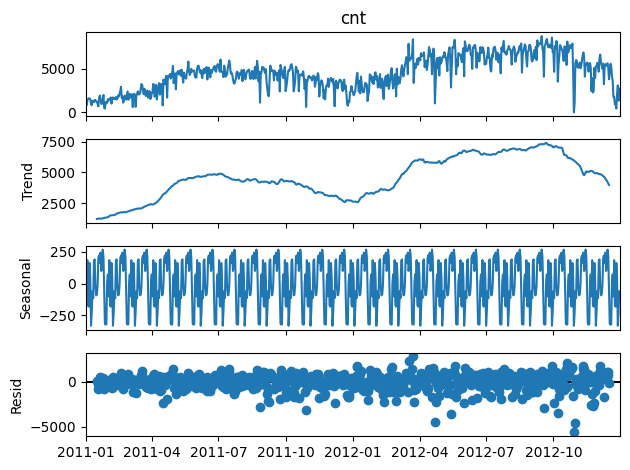

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


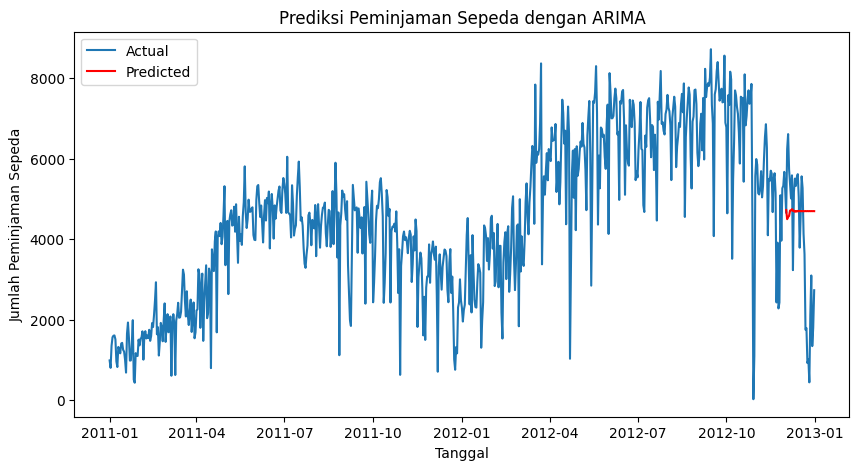

In [121]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
hour_df = pd.read_csv("hour.csv")

# Fitur yang digunakan untuk clustering
features = hour_df[['hr', 'cnt', 'workingday', 'season']]

# Standarisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Menentukan jumlah cluster optimal dengan Metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.show()

# Menggunakan K = 3 berdasarkan elbow method
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
hour_df['cluster'] = kmeans.fit_predict(features_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(10,6))
sns.scatterplot(x=hour_df['hr'], y=hour_df['cnt'], hue=hour_df['cluster'], palette='coolwarm')
plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Segmentasi Pengguna Berdasarkan Pola Peminjaman Sepeda")
plt.legend(title="Cluster")
plt.show()

# Menampilkan statistik per cluster
print(hour_df.groupby('cluster')[['cnt', 'workingday', 'season']].mean())

# ============================
# Time Series Analysis
# ============================

# Load dataset harian
day_df = pd.read_csv("day.csv")
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Set index sebagai datetime
day_df.set_index('dteday', inplace=True)

# Seasonal Decomposition
result = seasonal_decompose(day_df['cnt'], model='additive', period=30)
result.plot()
plt.show()

# ARIMA Model
train = day_df['cnt'][:-30]
test = day_df['cnt'][-30:]

model = ARIMA(train, order=(5,1,2))
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)

plt.figure(figsize=(10,5))
plt.plot(day_df.index, day_df['cnt'], label='Actual')
plt.plot(test.index, forecast, label='Predicted', color='red')
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Prediksi Peminjaman Sepeda dengan ARIMA")
plt.legend()
plt.show()




## Conclusion

**Conclution pertanyaan 1:**
- Peminjaman sepeda paling tinggi terjadi di musim panas dan semi, sedangkan musim dingin memiliki jumlah peminjaman terendah. Ini menunjukkan bahwa cuaca berperan penting dalam penggunaan sepeda.

**Conclution pertanyaan 2:**
- Penggunaan sepeda lebih tinggi pada hari kerja dibanding akhir pekan, mengindikasikan bahwa sepeda banyak digunakan sebagai alat transportasi utama, bukan sekadar untuk rekreasi.

**Conclution pertanyaan 3:**
- Pola peminjaman menunjukkan lonjakan di pagi dan sore hari, terutama saat jam sibuk, menandakan bahwa sepeda sering digunakan sebagai moda transportasi saat berangkat dan pulang kerja.